<a href="https://colab.research.google.com/github/afaheem01/Linear_Regression/blob/main/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("/content/economic_index.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         24 non-null     int64  
 1   year               24 non-null     int64  
 2   month              24 non-null     int64  
 3   interest_rate      24 non-null     float64
 4   unemployment_rate  24 non-null     float64
 5   index_price        24 non-null     int64  
dtypes: float64(2), int64(4)
memory usage: 1.2 KB


In [5]:
# To check if the dataframe has any null values or not.
df.isnull().sum()

Unnamed: 0           0
year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [7]:
# Dorpping unnamed column since it is not relivent.

df.drop(columns=["Unnamed: 0", "year", "month"],axis=1, inplace= True)

In [8]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [9]:
# check the relationship between each independent variable vs dependent variable.

import seaborn as sns

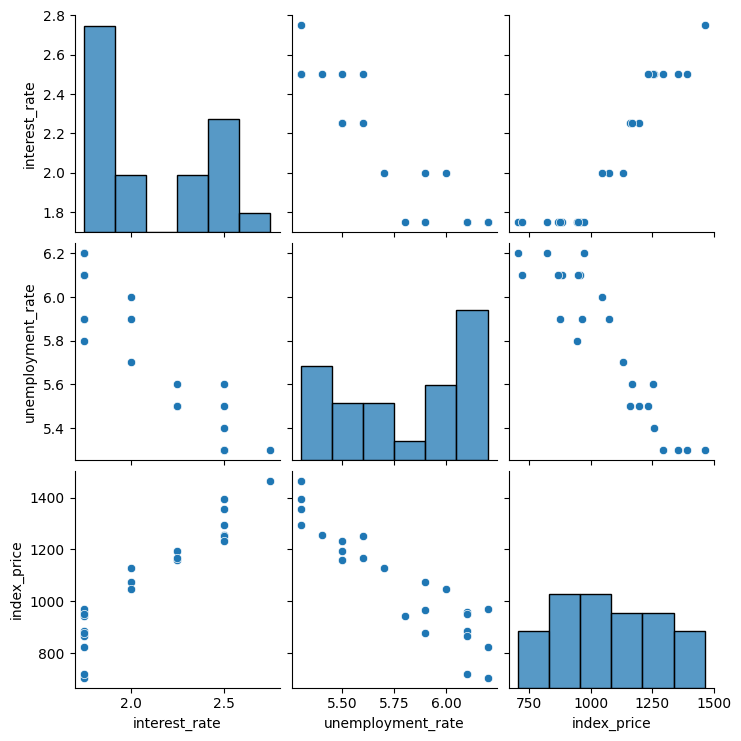

In [10]:
sns.pairplot(df)

In [20]:
# Checking the correlation between independent and dependent variables.
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [11]:
# Segregiate the data into independent and dependent variables.

X = df.iloc[:,:-1]
y= df.iloc[:,-1]

In [16]:
# Check whether the varaibles are correctly defined or nto.

X.head(2)

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3


In [15]:
y.head(2)

0    1464
1    1394
Name: index_price, dtype: int64

In [17]:
# Split the data for train and test for model training.

from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [21]:
# Standardize the values with lower level

from sklearn.preprocessing import StandardScaler



In [22]:
scaler= StandardScaler()

In [26]:
x_train=scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regression= LinearRegression()

In [29]:
regression.fit(x_train,y_train)

LinearRegression()

In [32]:
# check the coefficient and slope of the train data. Since we have two independent variables we got two slopes i,e B0 and B1

print("Coefficient:", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient: [  88.27275507 -116.25716066]
Intercept:  1053.4444444444443


In [33]:
# Now test the test data for prediction.

y_pred = regression.predict(x_test)

In [38]:
#  Find MAE, MSE and RMSE to know the error.

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [39]:
mae= mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)
r2_score= r2_score(y_test, y_pred)

print("MAE: ", mae)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2_Score: ", r2_score)

MAE:  59.935781523235484
MSE:  5793.762887712569
RMSE:  76.11677139574805
R2_Score:  0.8278978091457145
